In [1]:
import os
import sys
sys.path.insert(0, '../funzioni')
from funzioni import *
import json
import os
import sys
import re
import pandas as pd
sys.path.append('../../')
path = '../data_results'

import matplotlib.pyplot as plt

## Data Ingestion Analysys

In [2]:
df = pd.read_csv(path + '/data_ingestion_overview.csv')

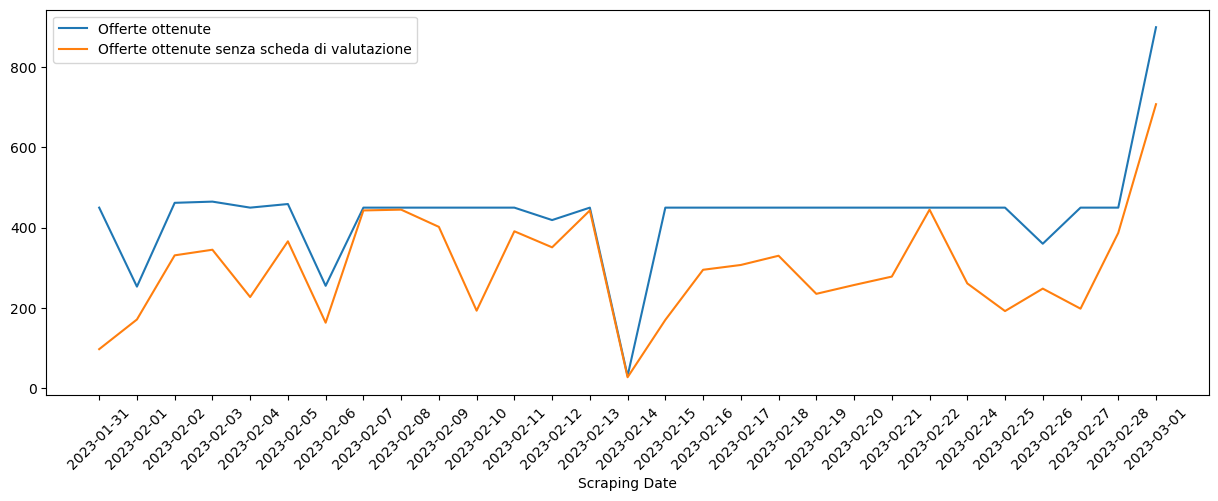

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df['scraping_date'], df['total_rows'], label='Offerte ottenute')
ax.plot(df['scraping_date'], df['ko_schedevalutazione'],  label='Offerte ottenute senza scheda di valutazione')
plt.xlabel('Scraping Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


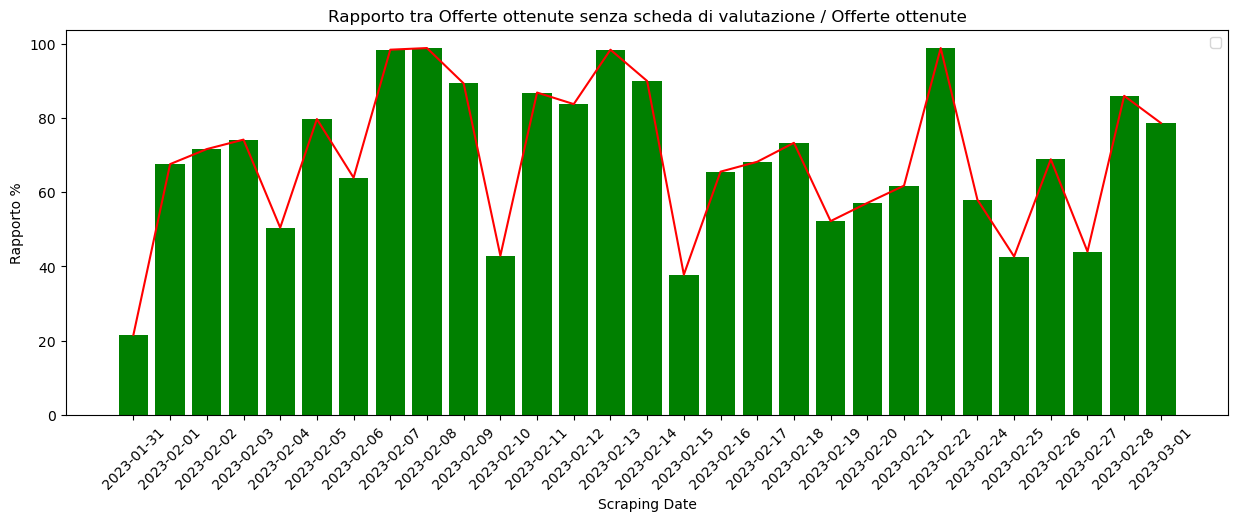

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(df['scraping_date'], df['ratio'], color='green')
ax.plot(df['scraping_date'], df['ratio'], color='red')

plt.xlabel('Scraping Date')
plt.xticks(rotation=45)
plt.ylabel('Rapporto %')
plt.title('Rapporto tra Offerte ottenute senza scheda di valutazione / Offerte ottenute')


plt.legend()
plt.show()

## Data quality run

In [8]:
df = pd.read_csv(path + '/data_quality_overview.csv')
df

,scraping_date,element_count,unexpected_percent,unexpected_percent_nonmissing,missing_percent
0,2023-01-31,450.0,10.971521,7.951480,13.135802
1,2023-02-01,258.0,22.982404,9.898819,36.620729
2,2023-02-02,468.0,24.957007,10.349355,40.028490
3,2023-02-03,480.0,25.274255,10.490398,40.555556
4,2023-02-04,450.0,19.149758,9.613169,28.617284
5,2023-02-05,459.0,27.369243,10.745921,44.743000
6,2023-02-06,264.0,21.962604,10.145042,34.132997
7,2023-02-07,450.0,31.998620,13.586126,51.868313
8,2023-02-08,450.0,31.299517,11.893004,52.419753
9,2023-02-09,450.0,28.299517,9.316872,48.823045


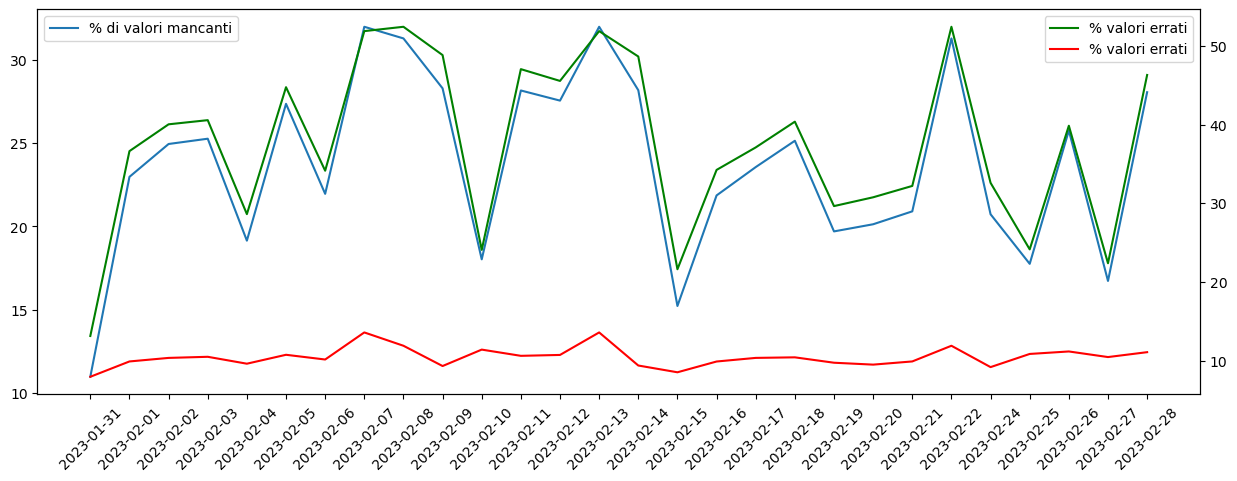

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df['scraping_date'], df['unexpected_percent'], label='% di valori mancanti')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
ax2 = plt.twinx()
ax2.plot(df['scraping_date'], df['missing_percent'], color='green', label='% valori errati')
#ax3 = plt.twinx()
ax2.plot(df['scraping_date'], df['unexpected_percent_nonmissing'], color='red', label='% valori errati')
plt.xlabel('Scraping Date')
plt.legend(loc='upper right') 
plt.show()

# TO DELETE

In [ ]:
#df  = parse_json()
#df1 = df[df['expectation_type'] != 'expect_table_columns_to_match_ordered_list'].iloc[:,:-3][['scraping_date','column','expectation_type','element_count','unexpected_percent', 'unexpected_percent_nonmissing', 'missing_percent']]
#df_scrapingdate = df1.groupby(['scraping_date','expectation_type']).agg({'element_count':max,'unexpected_percent':'mean', 'unexpected_percent_nonmissing':'mean', 'missing_percent':'mean' }).reset_index()
#df_scrapingdate.head()

In [ ]:
#fig, ax = plt.subplots()
#
## Cicla attraverso le colonne uniche del dataframe
#for col in df_scrapingdate['expectation_type'].unique():
#    # Seleziona solo le righe del dataframe corrispondenti alla colonna attuale
#    sub_df = df_scrapingdate[df_scrapingdate['expectation_type'] == col]
#        
#    # Traccia una linea per il numero di elementi per data di scraping
#    ax.plot(sub_df['scraping_date'], sub_df['unexpected_percent_nonmissing'], label=col+' - unexpected_percent_nonmissing')
#    # Traccia una linea per la percentuale di valori imprevisti per data di scraping
#    #ax.plot(sub_df['scraping_date'], sub_df['unexpected_percent'], label=col+' - Unexpected Percent')
#    # Traccia una linea per la percentuale di valori mancanti per data di scraping
#    #ax.plot(sub_df['scraping_date'], sub_df['missing_percent'], label=col+' - Missing Percent')
#
## Aggiungi legenda, etichette degli assi e titolo del grafico
##ax.legend()
#
#ax.set_xlabel('Scraping Date')
#ax.set_ylabel('Count/Percent')
#ax.set_title('Count and Percent by Column and Scraping Date')
#
## Mostra il grafico
#plt.show()

In [ ]:
#import pandas as pd
#import os
#df_append = pd.DataFrame()
#path = '../data'
#file_list = os.listdir(path)
#file_da_escludere = ['data_backup', 'company_overview.csv', 'jobs']
#file_list = list(set(file_list) - set(file_da_escludere))
#for e in file_list:
#    file_path = path + '/' + e
#    df = pd.read_csv(file_path).drop_duplicates().reset_index(drop=True)
#    df_append = df_append.append(df).drop_duplicates().reset_index(drop=True)
#dfr = df_append
#df_1 = df_append.groupby(['scraping_date'])[['job_link']].count().reset_index().rename(columns={'job_link':'total_rows'})
#df_2 = df_append[df_append['oppurtunita_carriera'].isna()].\
#groupby(['scraping_date'])[['job_link']].count().reset_index().rename(columns={'job_link':'ko_schedevalutazione'})
#df_eval = df_1.merge(df_2, on = 'scraping_date')
#df_eval['ratio'] = df_eval['ko_schedevalutazione']/df_eval['total_rows']*100